<!DOCTYPE html>
<html>
<head>
  <title>Ilora Bandyopadhyay_Python for Data Analysts_Individual Assignment</title>
</head>
<body>
  <h1>A1: Individual Assignment</h1>
  <p><strong>Name:</strong> Ilora Bandyopadhyay</p>
  <p><strong>Date:</strong> 12/02/2024</p>
  <p><strong>Course:</strong> Python for Data Analysts: Methods & Tools</p>
  <p><strong>Program:</strong> MBAN (Cohort 2)</p>
  <p><strong>School:</strong> Hult International Business School Boston</p>
  <p><strong>LinkedIn Link:</strong> <a href="https://www.linkedin.com/in/ilora-bandyopadhyay/">Ilora Bandyopadhyay's LinkedIn Profile</a></p>
  </ol>
</body>
</html>

# Introduction

## OCD:

Obsessive-Compulsive Disorder (OCD) is a mental health condition, which is characterized by intrusive, distressing thoughts and often accompanied by repetitive behaviors. These behaviors can significantly affect with daily life and cause considerable distress. OCD has a biological basis, with functional brain imaging studies providing insights into its pathophysiology. The condition can manifest in various forms, such as checking, compulsions, and symmetry obsessions.

This dataset analyzed encompasses a wide range of parameters, providing a detailed insight into the demographic and clinical profiles of the individuals. The dataset also delves into the specific nature of OCD symptoms, categorizing them into obsession and compulsion types. Severity of these symptoms is assessed using the Yale-Brown Obsessive-Compulsive Scale (Y-BOCS) scores for both obsessions and compulsions. Furthermore, it documents any co-occurring mental health conditions, including depression and anxiety diagnoses.

## About OCD Insight:

Tagline: Unraveling the complexities of OCD through data-driven insights.

Mission: To empower individuals with OCD and healthcare professionals with data-driven insights to improve diagnosis, treatment, and overall well-being.

Core Product: A comprehensive data analytics platform for OCD patient data.

Dataset has been collected from https://www.kaggle.com/datasets/ohinhaque/ocd-patient-dataset-demographics-and-clinical-data/

# Data Analytics of OCD patient data:
Here are the hypotheses that have been looked into for the dataset:

## Relationship between Age and Y-BOCS Scores: 
To visualize any potential correlation between age and the severity of OCD symptoms.

## Comparison of Y-BOCS Scores by Gender
Whether there are gender-based differences in the manifestation of OCD symptoms.

## Correlation between Education Level and Y-BOCS Scores
If there is any association between education level and the severity of OCD symptoms.

## Family History of OCD and severity of OCD symptoms
Exploring the impact of family history on the severity of OCD symptoms.

# Environment Preparation

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")  # This is to ignore any warnings that might pop up during execution

In [2]:
# Load Libraries

import pandas as pd                # data manipulation and wrangling
import numpy as np                 # numerical and scientific computing
import matplotlib.pyplot as plt    # general data visualization
import seaborn as sns              # interface for statistical visualization
import sklearn                     # for machine learning
import statsmodels.api as sm       # for statistic models
import sqlite3                     # SQL data management
import os                          # for reading working directory
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [3]:
np.random.seed(42)  # To ensure all the probabilistic things are reproducible

# Extract: Load Data Collection (import)

In [4]:
# Specify the path to the datasets
data_path = "./data/"

# Specify the filenames of the datasets
ocd_filename = "ocd_patient_dataset.csv"

# Read the CSV files and create backup copies
ocd_df_data = pd.read_csv(data_path + ocd_filename)

# Create working copies of the dataframes for analysis
ocd_df = ocd_df_data.copy()

In [5]:
# Let's check its structure
ocd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1500 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

## Data cleaning

In [6]:
#Checking for null in dataset
ocd_df.isna().sum()

Patient ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital Status                   0
Education Level                  0
OCD Diagnosis Date               0
Duration of Symptoms (months)    0
Previous Diagnoses               0
Family History of OCD            0
Obsession Type                   0
Compulsion Type                  0
Y-BOCS Score (Obsessions)        0
Y-BOCS Score (Compulsions)       0
Depression Diagnosis             0
Anxiety Diagnosis                0
Medications                      0
dtype: int64

In [7]:
#Checking for missing data
missing_data=ocd_df[ocd_df.isna().sum(axis=1)>0]
missing_data.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications


In [8]:
#Checking for duplicates
ocd_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [9]:
ocd_df[ocd_df.duplicated()]

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications


In [10]:
#Checking the range of the values, in order to identify outliers
ocd_df.describe()

,Patient ID,Age,Duration of Symptoms (months),Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions)
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,5541.254000,46.781333,121.745333,20.048000,19.62600
std,2562.389469,16.830321,67.404610,11.823884,11.78287
min,1017.000000,18.000000,6.000000,0.000000,0.00000
25%,3338.000000,32.000000,64.000000,10.000000,9.00000
50%,5539.500000,47.000000,121.000000,20.000000,20.00000
75%,7745.500000,61.000000,178.000000,31.000000,29.00000
max,9995.000000,75.000000,240.000000,40.000000,40.00000


We can conclude that the data set has no null values and no duplicates. We see the minimum and maximum value for the columns and the value range shows that there is no outliers. Thus, proceeding with further analysis.

Note: The Y-BOCS score (Obsessions and Compulsions) scale:

0–7: none
8–15: mild
16–23: moderate
24–31: severe
32–40: extreme

# TRANSFORM

## CHANGE DATA TYPE

In [11]:
#Changing object to category datatype to save space
cat_cols=['Gender','Ethnicity','Marital Status','Education Level','Previous Diagnoses','Family History of OCD','Obsession Type',
          'Compulsion Type','Depression Diagnosis','Anxiety Diagnosis','Medications' ]
for col in cat_cols:
    ocd_df[col]=ocd_df[col].astype('category')

In [12]:
ocd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Patient ID                     1500 non-null   int64   
 1   Age                            1500 non-null   int64   
 2   Gender                         1500 non-null   category
 3   Ethnicity                      1500 non-null   category
 4   Marital Status                 1500 non-null   category
 5   Education Level                1500 non-null   category
 6   OCD Diagnosis Date             1500 non-null   object  
 7   Duration of Symptoms (months)  1500 non-null   int64   
 8   Previous Diagnoses             1500 non-null   category
 9   Family History of OCD          1500 non-null   category
 10  Obsession Type                 1500 non-null   category
 11  Compulsion Type                1500 non-null   category
 12  Y-BOCS Score (Obsessions)      150

In [13]:
#Changing datatype of OCD Diagnosis Date from object to datetime
ocd_df['OCD Diagnosis Date']=pd.to_datetime(ocd_df['OCD Diagnosis Date'])
ocd_df.dtypes

Patient ID                                int64
Age                                       int64
Gender                                 category
Ethnicity                              category
Marital Status                         category
Education Level                        category
OCD Diagnosis Date               datetime64[ns]
Duration of Symptoms (months)             int64
Previous Diagnoses                     category
Family History of OCD                  category
Obsession Type                         category
Compulsion Type                        category
Y-BOCS Score (Obsessions)                 int64
Y-BOCS Score (Compulsions)                int64
Depression Diagnosis                   category
Anxiety Diagnosis                      category
Medications                            category
dtype: object

In [14]:
# Option to display all columns
pd.set_option('display.max_columns', None)
ocd_df.sample(5)

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
1116,2810,19,Male,Asian,Single,High School,2018-01-09,222,None,Yes,Harm-related,Ordering,30,9,Yes,Yes,Benzodiazepine
1368,2306,60,Male,Hispanic,Single,Some College,2018-01-23,143,GAD,Yes,Harm-related,Counting,13,35,Yes,Yes,None
422,7287,52,Female,Asian,Divorced,Graduate Degree,2015-06-30,52,None,No,Religious,Praying,18,23,No,Yes,Benzodiazepine
413,7253,43,Female,African,Single,Graduate Degree,2016-02-13,233,Panic Disorder,Yes,Hoarding,Counting,20,16,No,No,SNRI
451,6564,34,Female,Asian,Divorced,Some College,2022-05-05,27,MDD,Yes,Religious,Praying,18,30,No,Yes,None


In [15]:
ocd_df.describe()

,Patient ID,Age,Duration of Symptoms (months),Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions)
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,5541.254000,46.781333,121.745333,20.048000,19.62600
std,2562.389469,16.830321,67.404610,11.823884,11.78287
min,1017.000000,18.000000,6.000000,0.000000,0.00000
25%,3338.000000,32.000000,64.000000,10.000000,9.00000
50%,5539.500000,47.000000,121.000000,20.000000,20.00000
75%,7745.500000,61.000000,178.000000,31.000000,29.00000
max,9995.000000,75.000000,240.000000,40.000000,40.00000


As observed, the mean age of the patients is 47 years old. The minimum age is 18 years and maximum is 75 years.In this dataset, we see that three quarters of the age is lesser than 61 years old and only one quarter is below 32 years old. 

We see that three quarters have the symptoms lesser than approximately 15 years (i.e., 178 months) and the minimum duration is 6 months and maximum duration is 20 years (i.e., 240 months). 

The minimum Y-BOCS score is 0 and three quarters have the score lesser than 31 and 29 for Obsessions and Compulsions, respectively.The maximum Y-BOCS score is 40.

## Exploring the data

In [16]:
#The top 5 rows of the dataset
ocd_df.head(5)

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,None,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,None


In [17]:
#The last 6 rows of dataset
ocd_df.tail(6)

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
1494,5657,72,Male,Hispanic,Divorced,Graduate Degree,2017-09-20,238,MDD,Yes,Symmetry,Washing,14,25,No,Yes,SNRI
1495,5374,38,Male,Hispanic,Divorced,College Degree,2019-01-10,53,MDD,No,Contamination,Washing,21,33,Yes,Yes,SSRI
1496,5013,19,Female,Hispanic,Divorced,Graduate Degree,2022-09-14,160,GAD,Yes,Hoarding,Praying,25,16,Yes,Yes,SSRI
1497,6089,40,Male,Asian,Married,Some College,2018-03-13,100,None,Yes,Contamination,Counting,2,15,Yes,Yes,Benzodiazepine
1498,3808,37,Female,Caucasian,Married,Some College,2018-04-14,210,GAD,Yes,Contamination,Washing,16,7,Yes,No,Benzodiazepine
1499,2221,18,Male,Caucasian,Single,High School,2020-12-23,91,None,Yes,Hoarding,Ordering,22,34,Yes,No,SNRI


In [18]:
ocd_df.shape

(1500, 17)

In [19]:
# Get the shape of the DataFrame (rows, columns)
num_rows = ocd_df.shape[0]  # Number of rows
num_cols = ocd_df.shape[1]  # Number of columns

print(f"The 'ocd_df' DataFrame has {num_rows} rows and {num_cols} columns.")

The 'ocd_df' DataFrame has 1500 rows and 17 columns.


We can see that there the data is provided for 1500 patients.

## Exploratory Data Analysis (EDA)

### Binning and Discretization
To understand the population distribution by converting a continuous feature into categorical or ordinal data and transforming continuous data into discrete bins.

In [20]:
# Define bins and labels
bins = [14, 18, 30, 40, 50, 60, 70,float('inf')]
labels = ['Teenager (14-18)', 'Young Adult (18-30)', 
          'Adult (30-40)', 'Middle Aged (40-50)', 
          'Senior (50-60)', 'Elderly (60-70)', 
          'Very Elderly (70+)']

In [21]:
# Discretize age (lowest value in interval included, highest value excluded)
ocd_df['Age Group'] = pd.cut(ocd_df['Age'], 
                bins=bins, labels=labels)
ocd_df[['Age', 'Age Group']]

,Age,Age Group
0,32,Adult (30-40)
1,69,Elderly (60-70)
2,57,Senior (50-60)
3,27,Young Adult (18-30)
4,56,Senior (50-60)
...,...,...
1495,38,Adult (30-40)
1496,19,Young Adult (18-30)
1497,40,Adult (30-40)
1498,37,Adult (30-40)


In [22]:
# Calculating proportions for each age group 
# And duration of symtoms in months
grouped = ocd_df.groupby(['Age Group', 'Duration of Symptoms (months)']).size().unstack(fill_value=0) # Any missing value = 0
proportions = grouped.div(grouped.sum(axis=1), axis=0) #proportions by normalizing each row's values by the sum of its row
proportions

Duration of Symptoms (months),6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240
Age Group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Teenager (14-18),0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.040000,0.000000,0.000000,0.040000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.040000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.040000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000
Young Adult (18-30),0.000000,0.009615,0.000000,0.003205,0.009615,0.000000,0.000000,0.000000,0.012821,0.000000,0.003205,0.000000,0.003205,0.003205,0.003205,0.003205,0.000000,0.006410,0.016026,0.003205,0.003205,0.006410,0.000000,0.003205,0.000000,0.003205,0.006410,0.009615,0.006410,0.006410,0.003205,0.003205,0.003205,0.003205,0.003205,0.003205,0.000000,0.003205,0.003205,0.003205,0.009615,0.003205,0.009615,0.006410,0.000000,0.006410,0.000000,0.009615,0.000000,0.000000,0.006410,0.009615,0.016026,0.006410,0.003205,0.000000,0.000000,0.003205,0.006410,0.006410,0.003205,0.006410,0.000000,0.006410,0.009615,0.000000,0.003205,0.003205,0.003205,0.000000,0.006410,0.003205,0.006410,0.006410,0.003205,0.003205,0.000000,0.003205,0.003205,0.006410,0.003205,0.0032

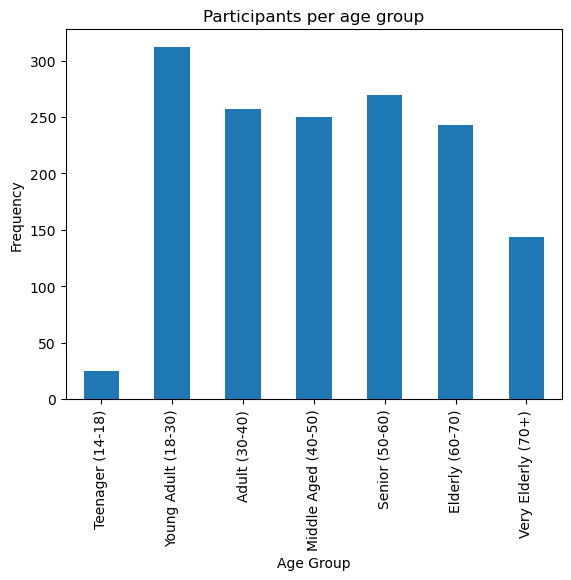

In [23]:
# Understanding the distribution of Age in the working sample data.

plt.title('Participants per age group')
grouped.sum(axis=1).plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

Majority of the patients are Yound Adults (18-30 years), followed by senior (50-60 years).

In [24]:
#Median age of patients
median_age=ocd_df['Age'].median()
median_age

47.0

The median age of the patient dataset is 47 years.

In [25]:
# Calculating the range of values in the 'Duration of Symptoms (months)' column
min_value = ocd_df['Duration of Symptoms (months)'].min()
max_value = ocd_df['Duration of Symptoms (months)'].max()

print(f"Range of 'Duration of Symptoms (months)' column: {min_value} to {max_value}")

Range of 'Duration of Symptoms (months)' column: 6 to 240


### Pivoting

In [26]:
# Pivot table for Age by Duration of Symptoms (months)
pivot_table = ocd_df.pivot_table(index=
            'Age', values='Duration of Symptoms (months)', 
            aggfunc='mean')
pivot_table

,Duration of Symptoms (months)
Age,
18,112.240000
19,127.760000
20,124.346154
21,100.761905
22,142.550000
23,106.416667
24,115.130435
25,132.888889
26,124.178571


The maximum duration of symptoms (mean) is for patients who are 48 years old. In fact, patients 18 years old also have suffered from the symptoms for 9 years (~112 months). 

### Melting

In [27]:
df_ocd_melt=ocd_df.melt(id_vars=['Age'],
                    value_vars=['Y-BOCS Score (Obsessions)','Y-BOCS Score (Compulsions)'])
df_ocd_melt

,Age,variable,value
0,32,Y-BOCS Score (Obsessions),17
1,69,Y-BOCS Score (Obsessions),21
2,57,Y-BOCS Score (Obsessions),3
3,27,Y-BOCS Score (Obsessions),14
4,56,Y-BOCS Score (Obsessions),39
...,...,...,...
2995,38,Y-BOCS Score (Compulsions),33
2996,19,Y-BOCS Score (Compulsions),16
2997,40,Y-BOCS Score (Compulsions),15
2998,37,Y-BOCS Score (Compulsions),7


This shows the Age related to the Y-BOCS score (Obsessions and Compulsions).The outcome shows that the severity of the OCD symptoms can be severe at any age. We can see here that both patients who are 56 and 18 years old have the Y-BOCS score more than 30.

### Relationship between Age, duration of symptoms and Y-BOCS Scores

In [28]:
# Grouping data by age and calculating the average severity of mental health issues and duration
ocd_severity_grouped = ocd_df.groupby('Age')[['Duration of Symptoms (months)','Y-BOCS Score (Obsessions)',
                                              'Y-BOCS Score (Compulsions)']].mean()
ocd_severity_grouped

,Duration of Symptoms (months),Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions)
Age,,,
18,112.240000,20.480000,20.360000
19,127.760000,20.440000,20.440000
20,124.346154,19.230769,18.884615
21,100.761905,16.904762,19.095238
22,142.550000,19.100000,18.950000
23,106.416667,20.583333,18.166667
24,115.130435,22.043478,14.826087
25,132.888889,21.296296,20.888889
26,124.178571,20.607143,22.964286


<Figure size 2000x1000 with 0 Axes>

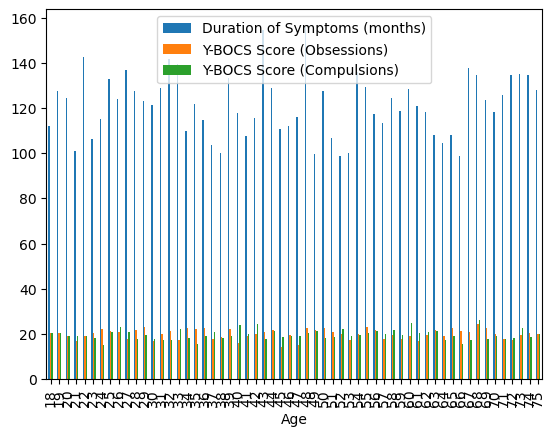

In [29]:
# Creating bar plots to visualize this relationship
plt.figure(figsize=(20,10))
ocd_severity_grouped.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

The graph shows a positive correlation between duration of symptoms and YBOCS score for both obsessions and compulsions. This suggests that the severity of OCD symptoms increases with the duration of the illness.

One possible explanation can be the longer someone has OCD, the more time they have to develop and elaborate on their obsessions and compulsions. Additionally, people with OCD may experience more negative consequences from their illness over time, which can lead to an increase in symptom severity.

The findings of this study suggest that duration of symptoms is an important factor to consider when making treatment decisions for OCD. Individuals with a longer duration of symptoms may need more intensive or longer-term treatment.

In [30]:
#Grouping the Y-BOCS score based on the scale
bins=[0,7,15,23,31,40]
labels=['None (0-7)','Mild (8-15)','Moderate(16-23)','Severe (24-31)','Extreme (32-40)']


In [31]:
ocd_df['Y-BOCS Score (Obsessions) Scale']= pd.cut(ocd_df['Y-BOCS Score (Obsessions)'], bins=bins, labels=labels)
ocd_df[['Y-BOCS Score (Obsessions)','Y-BOCS Score (Obsessions) Scale']]

,Y-BOCS Score (Obsessions),Y-BOCS Score (Obsessions) Scale
0,17,Moderate(16-23)
1,21,Moderate(16-23)
2,3,None (0-7)
3,14,Mild (8-15)
4,39,Extreme (32-40)
...,...,...
1495,21,Moderate(16-23)
1496,25,Severe (24-31)
1497,2,None (0-7)
1498,16,Moderate(16-23)


In [32]:
ocd_df

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,Age Group,Y-BOCS Score (Obsessions) Scale
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI,Adult (30-40),Moderate(16-23)
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,None,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI,Elderly (60-70),Moderate(16-23)
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine,Senior (50-60),None (0-7)
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI,Young Adult (18-30),Mild (8-15)
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,None,Senior (50-60),Extreme (32-40)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,Male,Hispanic,Divorced,College Degree,2019-01-10,53,MDD,No,Contamination,Washing,21,33,Yes,Yes,SSRI,Adult (30-40),Moderate(16-23)
1496,5013,19,Female,Hispanic,Divorced,Graduate Degree,2022-09-14,160,GAD,Yes,Hoarding,Praying,25,16,Yes,Yes,SSRI,Young Adult (18-30),Severe (24-31)
1497,6089,40,Male,Asian,Married,Some College,2018-03-13,100,None,Yes,Contamination,Counting,2,15,Yes,Yes,Benzodiazepine,Adult (30-40),None (0-7)
1498,3808,37,Female,Caucasian,Married,Some College,2018-04-14,210,GAD,Yes,Contamination,Washing,16,7,Yes,No,Benzodiazepine,Adult (30-40),Moderate(16-23)


In [33]:
ocd_df['Y-BOCS Score (Compulsions) Scale']= pd.cut(ocd_df['Y-BOCS Score (Compulsions)'], bins=bins, labels=labels)
ocd_df[['Y-BOCS Score (Compulsions)','Y-BOCS Score (Compulsions) Scale']]

,Y-BOCS Score (Compulsions),Y-BOCS Score (Compulsions) Scale
0,10,Mild (8-15)
1,25,Severe (24-31)
2,4,None (0-7)
3,28,Severe (24-31)
4,18,Moderate(16-23)
...,...,...
1495,33,Extreme (32-40)
1496,16,Moderate(16-23)
1497,15,Mild (8-15)
1498,7,None (0-7)


In [34]:
ocd_df

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,Age Group,Y-BOCS Score (Obsessions) Scale,Y-BOCS Score (Compulsions) Scale
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI,Adult (30-40),Moderate(16-23),Mild (8-15)
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,None,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI,Elderly (60-70),Moderate(16-23),Severe (24-31)
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine,Senior (50-60),None (0-7),None (0-7)
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI,Young Adult (18-30),Mild (8-15),Severe (24-31)
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,None,Senior (50-60),Extreme (32-40),Moderate(16-23)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,Male,Hispanic,Divorced,College Degree,2019-01-10,53,MDD,No,Contamination,Washing,21,33,Yes,Yes,SSRI,Adult (30-40),Moderate(16-23),Extreme (32-40)
1496,5013,19,Female,Hispanic,Divorced,Graduate Degree,2022-09-14,160,GAD,Yes,Hoarding,Praying,25,16,Yes,Yes,SSRI,Young Adult (18-30),Severe (24-31),Moderate(16-23)
1497,6089,40,Male,Asian,Married,Some College,2018-03-13,100,None,Yes,Contamination,Counting,2,15,Yes,Yes,Benzodiazepine,Adult (30-40),None (0-7),Mild (8-15)
1498,3808,37,Female,Caucasian,Married,Some College,2018-04-14,210,GAD,Yes,Contamination,Washing,16,7,Yes,No,Benzodiazepine,Adult (30-40),Moderate(16-23),None (0-7)


Creating three new columns 'Age Group', 'Y-BOCS Score (Obsessions) Scale' and 'Y-BOCS Score (Obsessions) Scale' that show the level of severity of the symptoms based on the Y-BOCS score.

In [35]:
grouped=ocd_df.groupby(['Y-BOCS Score (Obsessions) Scale', 'Obsession Type']).size().unstack(fill_value=0)
proportions=grouped.div(grouped.sum(axis=1), axis=0)
proportions

Obsession Type,Contamination,Harm-related,Hoarding,Religious,Symmetry
Y-BOCS Score (Obsessions) Scale,,,,,
None (0-7),0.244000,0.164000,0.160000,0.232000,0.200000
Mild (8-15),0.195122,0.212544,0.177700,0.209059,0.205575
Moderate(16-23),0.179153,0.231270,0.201954,0.205212,0.182410
Severe (24-31),0.238754,0.231834,0.169550,0.179931,0.179931
Extreme (32-40),0.181818,0.236364,0.215152,0.190909,0.175758


In [36]:
grouped=ocd_df.groupby(['Y-BOCS Score (Compulsions) Scale', 'Compulsion Type']).size().unstack(fill_value=0)
proportions=grouped.div(grouped.sum(axis=1), axis=0)
proportions

Compulsion Type,Checking,Counting,Ordering,Praying,Washing
Y-BOCS Score (Compulsions) Scale,,,,,
None (0-7),0.211679,0.189781,0.189781,0.156934,0.251825
Mild (8-15),0.202749,0.223368,0.206186,0.182131,0.185567
Moderate(16-23),0.197952,0.215017,0.180887,0.191126,0.215017
Severe (24-31),0.190972,0.211806,0.190972,0.194444,0.211806
Extreme (32-40),0.150943,0.204403,0.204403,0.220126,0.220126


For patients with extreme OCD conditions, the highest instance of obsession type is Harm-Related and contamination, and compulsion type is praying and counting.

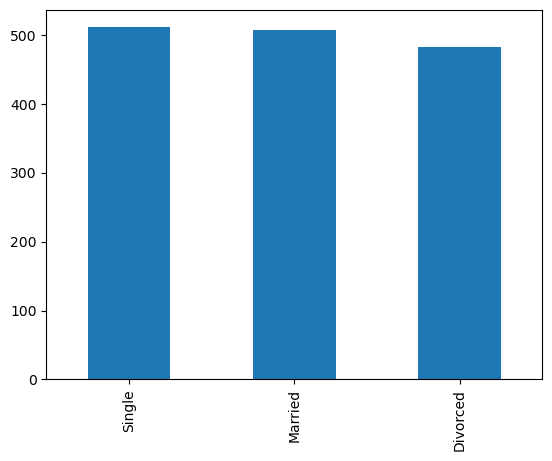

In [37]:
#Distribution of OCD seen in patients based on Marital status
ocd_df['Marital Status'].value_counts().plot(kind='bar');

There is a significant increase in the frequency of OCD in patients who are married and divorced. This suggests that marital status may be a risk factor for developing OCD.

One possibility is that the stress of marriage and divorce can trigger the onset of OCD symptoms in individuals who are already at risk for the disorder. Another possibility is that married and divorced individuals may be more likely to seek treatment for OCD, which may lead to an overrepresentation of these groups in the sample.

It is also important to note that the graph shows an average trend. There are many married and divorced individuals with OCD who have lower YBOCS scores than single individuals, and there are many single individuals with OCD who have higher YBOCS scores than married and divorced individuals.

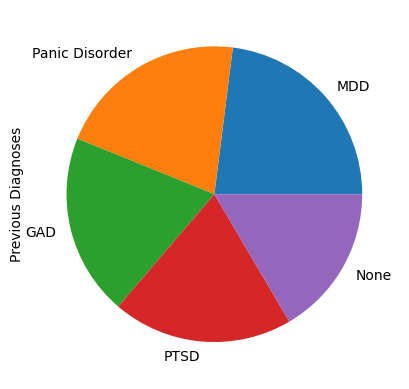

In [38]:
#History of previous diagnoses distribution
ocd_df['Previous Diagnoses'].value_counts().plot(kind='pie');

The graph shows the distribution of previous diagnoses among patients with OCD. The most common previous diagnoses are posttraumatic stress disorder (PTSD),major depressive disorder (MDD), panic disorder and generalized anxiety disorder (GAD). This suggests that these disorders are often comorbid with OCD.

The comorbidity of OCD with other mental disorders can make diagnosis and treatment more complex. For example, patients with OCD and anxiety disorder may have difficulty distinguishing between obsessive thoughts and worries. Additionally, patients with OCD and depression may be less motivated to engage in treatment.

The findings of this study suggest that it is important to screen for comorbid mental disorders in patients with OCD. Early diagnosis and treatment of comorbid disorders can improve outcomes for patients with OCD.

In [39]:
#Grouping data based on family history of OCD and Ethnicity
grouped_df=ocd_df.groupby(['Family History of OCD','Ethnicity'])
grouped_df

In [40]:
series_result=grouped_df.size().reset_index(name='Count')
series_result

,Family History of OCD,Ethnicity,Count
0,No,African,153
1,No,Asian,202
2,No,Caucasian,198
3,No,Hispanic,187
4,Yes,African,171
5,Yes,Asian,184
6,Yes,Caucasian,200
7,Yes,Hispanic,205


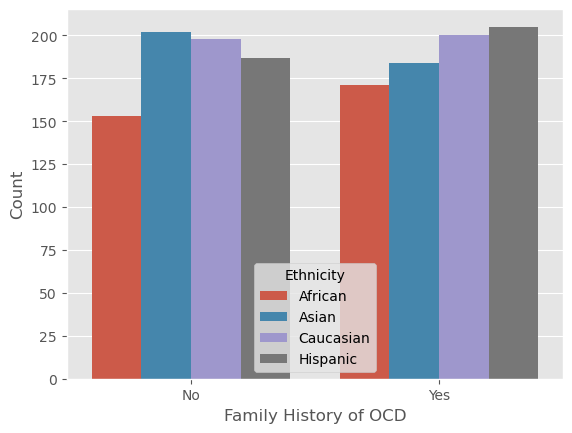

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

sns.barplot(data=series_result, x='Family History of OCD', y='Count', hue='Ethnicity')

plt.show()

With NO family history of OCD, there is high number of Asians with OCD. With family history, there is high number of Hispanic with OCD.

### Correlation between age and the severity of OCD symptoms.

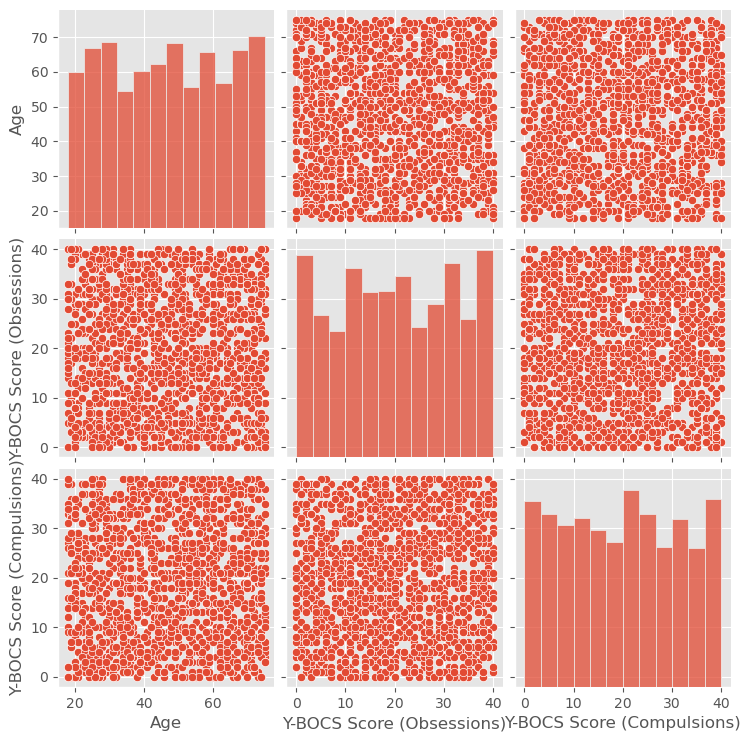

In [42]:
sns.pairplot(ocd_df, vars=['Age','Y-BOCS Score (Obsessions)','Y-BOCS Score (Compulsions)']);

It is difficult to conclude from the above graphs if there is any correlation between Age and Y-BOCS Score (Obsessions and Compulsions).

It is important to note that the graph shows an average trend. There are many people with OCD who have symptoms that onset at a younger or older age than the average, and there are many people with OCD whose symptoms do not improve over time.

### Relationship of Gender to YBOCS score?

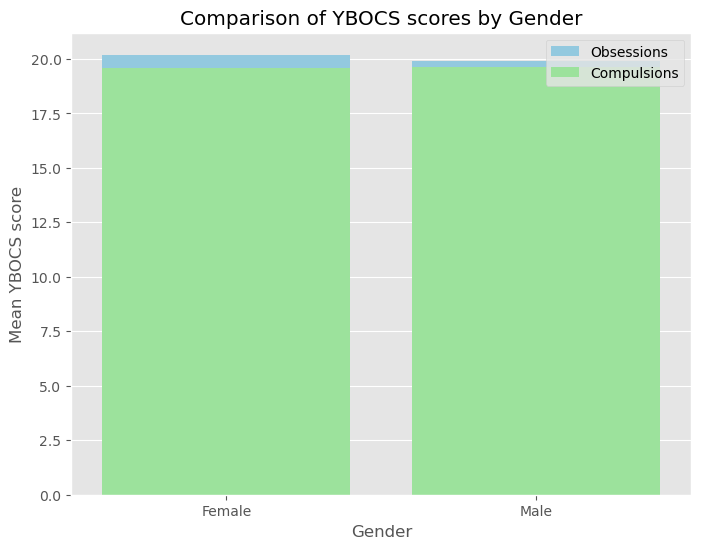

In [43]:
# To study correlation between Gender and YBOCS score
gender_ybocs_data = ocd_df[['Gender', 'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']]

# Group the data by gender and calculate the mean YBOCS scores for each gender
gender_ybocs_mean = gender_ybocs_data.groupby('Gender').mean()

# Plot the comparison of YBOCS scores by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_ybocs_mean.index, y='Y-BOCS Score (Obsessions)', data=gender_ybocs_mean, color='skyblue', label='Obsessions')
sns.barplot(x=gender_ybocs_mean.index, y='Y-BOCS Score (Compulsions)', data=gender_ybocs_mean, color='lightgreen', label='Compulsions')
plt.title('Comparison of YBOCS scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean YBOCS score')
plt.legend()
plt.show()

The graph shows a comparison of YBOCS scores by gender. Females have higher YBOCS scores for both obsessions and compulsions than males. This suggests that females may be more likely to experience OCD symptoms than males.

There are a number of possible explanations for this gender difference. One possibility is that there are biological differences between males and females that make females more susceptible to OCD. For example, females have higher levels of estrogen, which has been shown to be involved in the development of OCD.

It is also important to note that the graph shows an average trend. There are many females with OCD who have lower YBOCS scores than males, and there are many males with OCD who have higher YBOCS scores than females.

### Association of Education level with YBOCS score


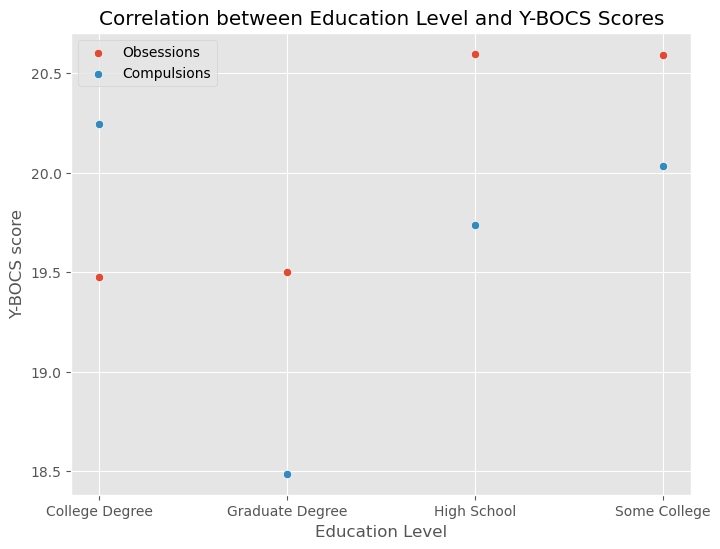

In [44]:
#To study correlation between Education level and YBOCS score

# Filter the dataset for relevant columns
relevant_columns = ['Education Level', 'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']
education_ybocs_data = ocd_df[relevant_columns]

# Group the data by education level and calculate the mean YBOCS scores for each gender
education_ybocs_mean = education_ybocs_data.groupby('Education Level').mean()

# Plot the correlation between Education Level and Y-BOCS Scores
plt.figure(figsize=(8, 6))
# Scatter plot for Y-BOCS Score (Obsessions)
sns.scatterplot(x='Education Level', y='Y-BOCS Score (Obsessions)', data=education_ybocs_mean, label='Obsessions')
# Scatter plot for Y-BOCS Score (Compulsions)
sns.scatterplot(x='Education Level', y='Y-BOCS Score (Compulsions)', data=education_ybocs_mean, label='Compulsions')
plt.title('Correlation between Education Level and Y-BOCS Scores')
plt.xlabel('Education Level')
plt.ylabel('Y-BOCS score')
plt.legend()
plt.show()

The results of this study suggest that there is a positive correlation between education level and YBOCS scores for Obsessions and a negative correlation between education level and YBOCS scores for Compulsions. This suggests that individuals with higher levels of education may be more likely to experience obsessions, but they are also more likely to have effective coping mechanisms for dealing with them. More research is needed to confirm these findings and to determine the causal mechanisms underlying these associations.

###  Impact of Family history of OCD related to YBOCS score

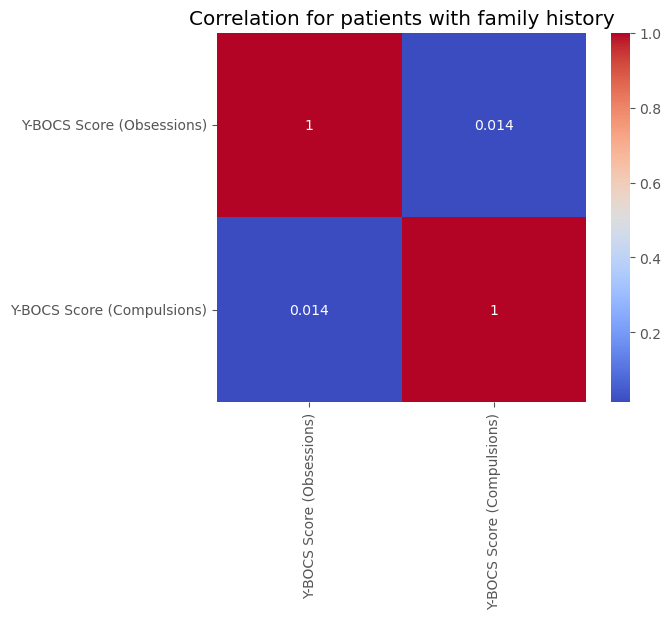

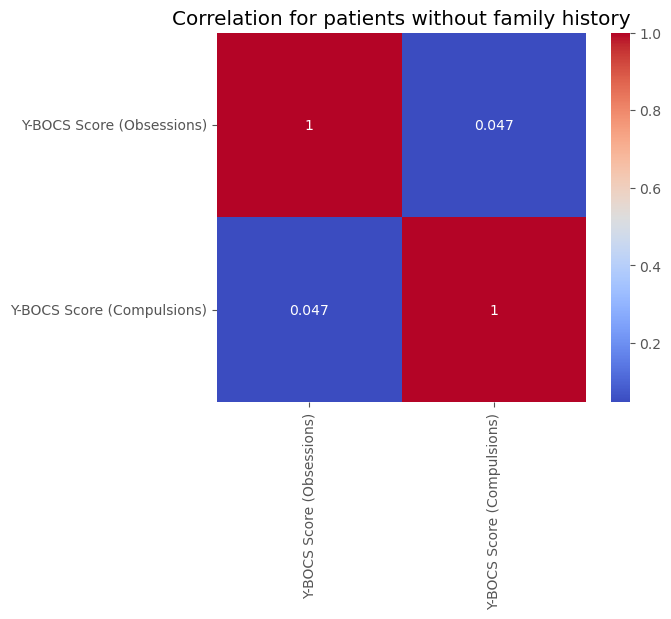

In [45]:
# To see if Family history of OCD is related to YBOCS score

# Selecting the relevant columns for correlation
selected_data_with_family_history = ocd_df[ocd_df['Family History of OCD'] == 'Yes'][['Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']]
selected_data_without_family_history = ocd_df[ocd_df['Family History of OCD'] == 'No'][['Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']]

# Calculating the correlation for patients with family history
correlation_with_family_history = selected_data_with_family_history.corr()

# Calculating the correlation for patients without family history
correlation_without_family_history = selected_data_without_family_history.corr()

# Visualizing the correlation
sns.heatmap(correlation_with_family_history, annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation for patients with family history')
plt.show()

sns.heatmap(correlation_without_family_history, annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation for patients without family history')
plt.show()

The correlation coefficients between YBOCS obsessions and YBOCS compulsions are very low for both patients without family history of OCD (0.047) and patients with family history of OCD (0.014). This means that there is a very weak relationship between the severity of obsessions and the severity of compulsions in both groups of patients.

Patients with more severe obsessions are not necessarily more likely to have more severe compulsions, and vice versa. This suggests that obsessions and compulsions may be relatively independent symptoms of OCD.

## Correlation Matrix

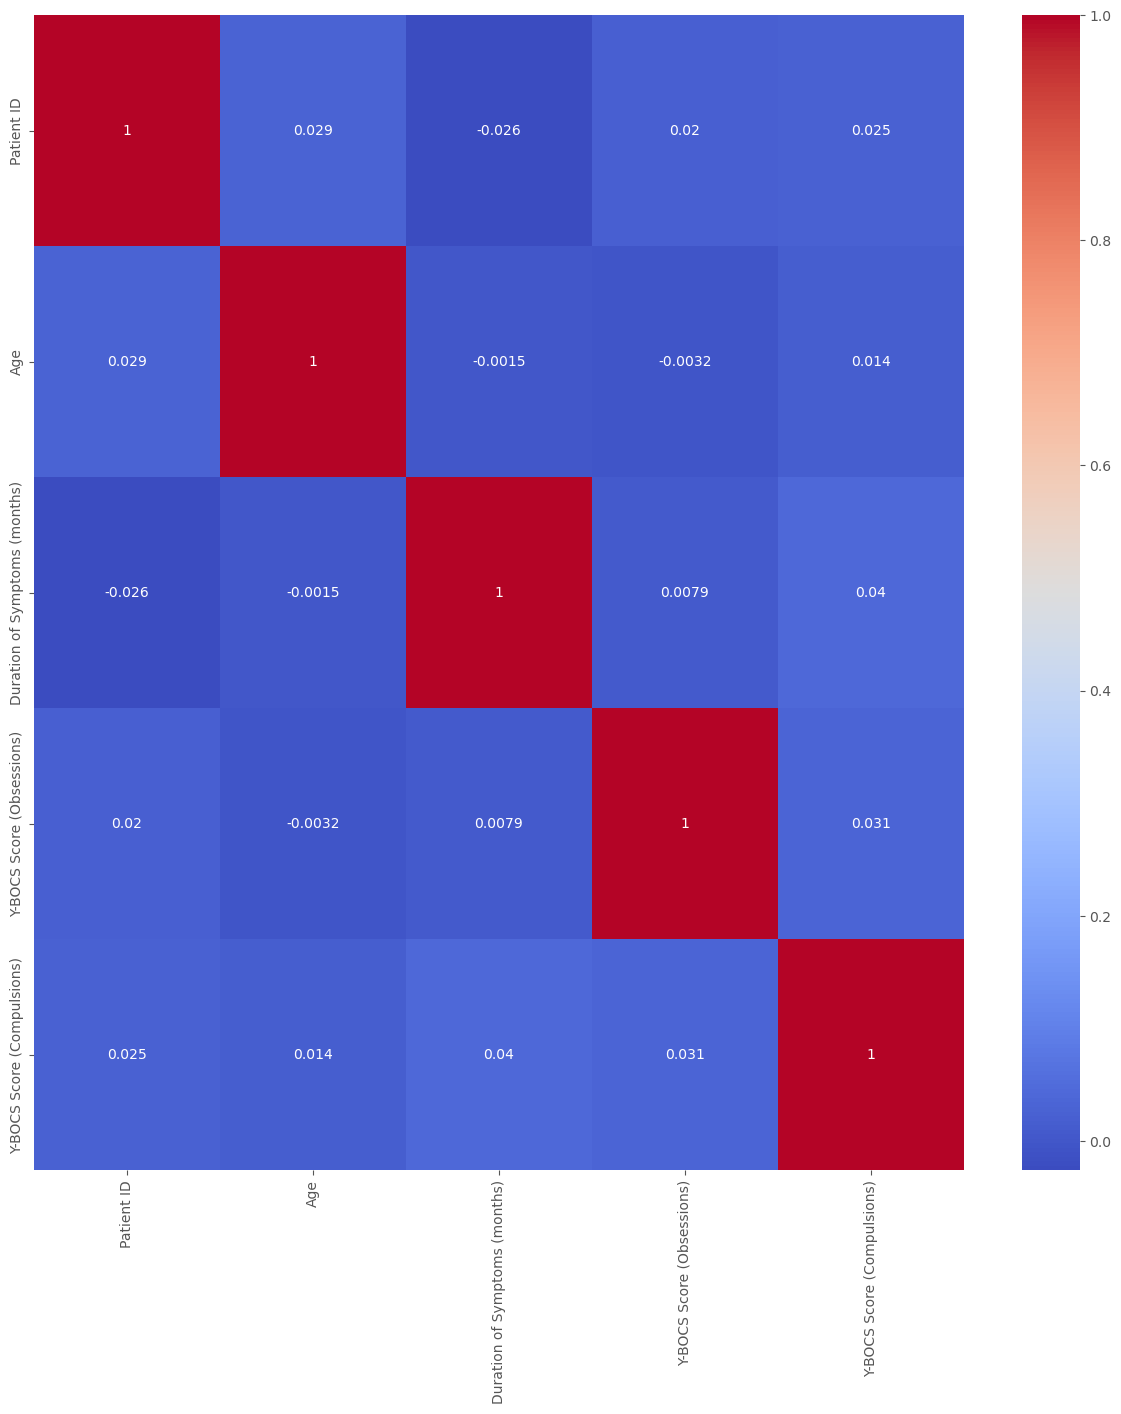

In [46]:
plt.figure(figsize=(15,15))
sns.heatmap(ocd_df.select_dtypes(np.number).
            corr(), annot=True, cmap='coolwarm');

The correlation matrix shows that there are a number of weak correlations between the variables in the dataset. 
YBOCS Score (Obsessions) and YBOCS Score (Compulsions) (0.031)
YBOCS Score (Obsessions) and Duration of Symptoms (months) (0.008)
YBOCS Score (Compulsions) and Duration of Symptoms (months) (0.04)

These correlations suggest that the severity of OCD symptoms is associated with the duration of the illness. 

## Chi Square Test


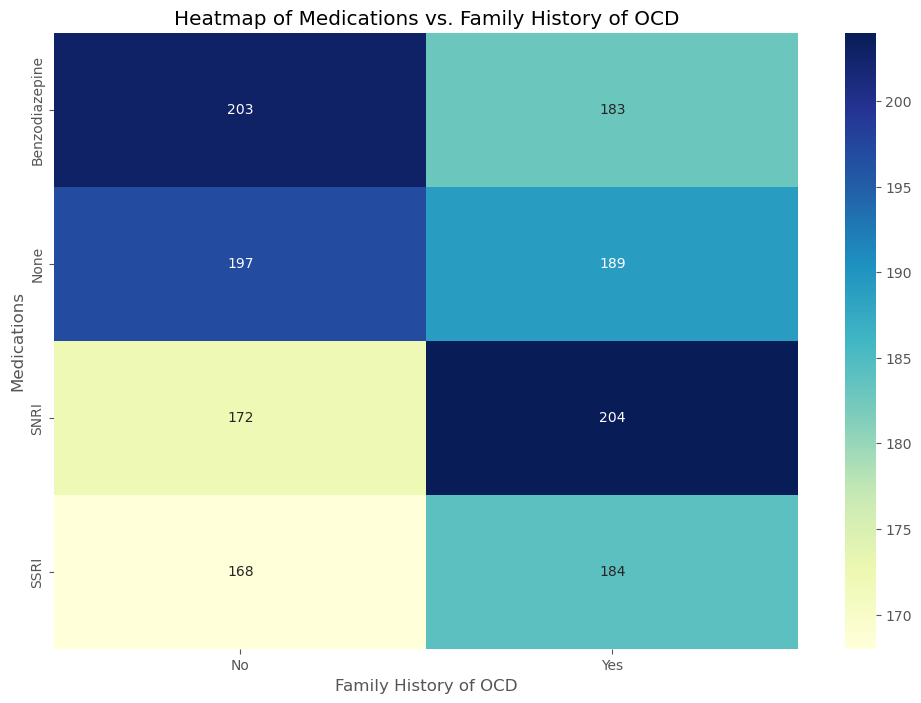

Chi-Square Statistic: 4.386862741494911
P-value: 0.22260661200125176
Degrees of Freedom: 3
Expected Frequencies:
[[190.42666667 195.57333333]
 [190.42666667 195.57333333]
 [185.49333333 190.50666667]
 [173.65333333 178.34666667]]


In [47]:
# Preparing data for the Chi-Square Test
contingency_table = pd.crosstab(ocd_df['Medications'], ocd_df['Family History of OCD'])

# Performing Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Visualization: Heatmap of the contingency table
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Heatmap of Medications vs. Family History of OCD')
plt.ylabel('Medications')
plt.xlabel('Family History of OCD')
plt.show()

# Chi-Square Test Result
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)


Result Interpretation:
- The chi-square statistic is relatively high (4.3868), which suggests that there may be a weak association between the two variables

Decision:
- Even though our Chi-Square is high, since the p-value is higher than the typical alpha level of 0.05, we fail to reject the null hypothesis. Thus, we cannot conclude that there is a significant association between medications and family history of OCD.

Visualization:
- The heatmap shows the frequency of responses for each combination of 'Medications' and 'Family History of OCD'. This visualization helps in understanding the distribution of responses across different categories.

SSRIs (selective serotonin reuptake inhibitors) and SNRIs (serotonin-norepinephrine reuptake inhibitors) are more likely to be prescribed to individuals with a family history of OCD. This is because these medications are generally considered to be the most effective treatments for OCD.

# Conclusion
This study provides a comprehensive overview of the characteristics and clinical factors associated with OCD in a diverse patient population. The findings highlight the importance of considering age, gender, marital status, education level, family history, and duration of symptoms when assessing the risk and severity of OCD. Additionally, the study underscores the need for personalized treatment approaches that target the unique factors contributing to each patient's OCD presentation.

Key Findings:

The mean age of patients with OCD is 47 years, with a wide range of 18 to 75 years.
The severity of OCD symptoms increases with the duration of the illness.
Females have higher YBOCS scores for both obsessions and compulsions than males.
Individuals with a family history of OCD are more likely to experience more severe OCD symptoms.
SSRIs and SNRIs are more likely to be prescribed to individuals with a family history of OCD.

Implications for Practice:

Clinicians should consider age, gender, marital status, education level, family history, and duration of symptoms when assessing the risk and severity of OCD.
Personalized treatment plans should target the unique factors contributing to each patient's OCD presentation.
Early intervention and treatment of comorbid mental disorders can improve outcomes for patients with OCD.

## Factors to be considered for OCD Insight
- To match the target audience of patients and healthcare professionals
- To develop personalized assessment tools that consider individual factors such as age, gender, marital status, education level, family history, and duration of symptoms.
- To establish partnerships with healthcare providers and research institutions
- To engage with patient advocacy groups to gather feedback and ensure that OCD Insight's products are accessible and user-friendly.
- To track the effectiveness of OCD Insight's products and services in improving patient outcomes.
- To design educational resources and support programs for individuals living with OCD and their families


# References

1. Understanding OCD. Obsessive-Compulsive and Related Disorders. “Understanding OCD.” Obsessive-Compulsive and Related Disorders, med.stanford.edu/ocd/about/understanding.html. Accessed 3 Dec. 2023. (https://med.stanford.edu/ocd/about/understanding.html)
2. Types of OCD. “Types of OCD.” OCDUK, www.ocduk.org/ocd/types/. Accessed 3 Dec. 2023.  (https://www.ocduk.org/ocd/types/)
3. Y BOCS Scale. “Yale–Brown Obsessive–Compulsive Scale.” Embrace Autism, 10 July 2023, embrace-autism.com/yale-brown-obsessive-compulsive-scale/.  (https://embrace-autism.com/yale-brown-obsessive-compulsive-scale/)
4. Female OCD biolgical reasons: “Hormones, Mental Health and the Mind/Body Connection.” Anxiety and Depression Association of America, ADAA, 2 May 2023, adaa.org/learn-from-us/from-the-experts/blog-posts/professional/hormones-mental-health-and-mindbody (https://adaa.org/learn-from-us/from-the-experts/blog-posts/professional/hormones-mental-health-and-mindbody#:~:text=For%20women%2C%20the%20menstrual%20cycle,the%20development%20of%20OCD%20symptoms)

## Youtube video link:

https://www.youtube.com/watch?v=rXhagRHQk-E